<a href="https://colab.research.google.com/github/Darius2527/CustomerSegmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation

##Step 1: Importing dataset

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Online Retail final.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,570287,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,10-10-2011,2.89,17425,United Kingdom
1,565439,21754,HOME BUILDING BLOCK WORD,3,04-09-2011,6.25,14852,United Kingdom
2,565456,22751,FELTCRAFT PRINCESS OLIVIA DOLL,2,04-09-2011,3.75,16629,United Kingdom
3,576857,23101,SILVER STARS TABLE DECORATION,1,16-11-2011,0.83,12748,United Kingdom
4,570333,23329,DECORATIVE WICKER HEART LARGE,1,10-10-2011,1.65,18126,United Kingdom
...,...,...,...,...,...,...,...,...
74995,546635,21086,SET/6 RED SPOTTY PAPER CUPS,4,15-03-2011,0.65,16392,United Kingdom
74996,566778,23282,FOLDING BUTTERFLY MIRROR IVORY,3,15-09-2011,0.83,17961,United Kingdom
74997,548867,22584,PACK OF 6 PANNETONE GIFT BOXES,1,04-04-2011,2.55,14719,United Kingdom
74998,537781,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,08-12-2010,1.65,17341,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75000 non-null  object 
 1   StockCode    75000 non-null  object 
 2   Description  75000 non-null  object 
 3   Quantity     75000 non-null  int64  
 4   InvoiceDate  75000 non-null  object 
 5   UnitPrice    75000 non-null  float64
 6   CustomerID   75000 non-null  int64  
 7   Country      75000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
segmentation_df = df.copy()
segmentation_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,570287,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,10-10-2011,2.89,17425,United Kingdom
1,565439,21754,HOME BUILDING BLOCK WORD,3,04-09-2011,6.25,14852,United Kingdom
2,565456,22751,FELTCRAFT PRINCESS OLIVIA DOLL,2,04-09-2011,3.75,16629,United Kingdom
3,576857,23101,SILVER STARS TABLE DECORATION,1,16-11-2011,0.83,12748,United Kingdom
4,570333,23329,DECORATIVE WICKER HEART LARGE,1,10-10-2011,1.65,18126,United Kingdom
...,...,...,...,...,...,...,...,...
74995,546635,21086,SET/6 RED SPOTTY PAPER CUPS,4,15-03-2011,0.65,16392,United Kingdom
74996,566778,23282,FOLDING BUTTERFLY MIRROR IVORY,3,15-09-2011,0.83,17961,United Kingdom
74997,548867,22584,PACK OF 6 PANNETONE GIFT BOXES,1,04-04-2011,2.55,14719,United Kingdom
74998,537781,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,08-12-2010,1.65,17341,United Kingdom


##Step 2: Preprocessing dataset

###Creating recency column (how recently has customer made purchase?)

In [ ]:
segmentation_df['Date'] = pd.to_datetime(segmentation_df['InvoiceDate'], format = '%d-%m-%Y')
segmentation_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,570287,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,10-10-2011,2.89,17425,United Kingdom,2011-10-10
1,565439,21754,HOME BUILDING BLOCK WORD,3,04-09-2011,6.25,14852,United Kingdom,2011-09-04
2,565456,22751,FELTCRAFT PRINCESS OLIVIA DOLL,2,04-09-2011,3.75,16629,United Kingdom,2011-09-04
3,576857,23101,SILVER STARS TABLE DECORATION,1,16-11-2011,0.83,12748,United Kingdom,2011-11-16
4,570333,23329,DECORATIVE WICKER HEART LARGE,1,10-10-2011,1.65,18126,United Kingdom,2011-10-10
...,...,...,...,...,...,...,...,...,...
74995,546635,21086,SET/6 RED SPOTTY PAPER CUPS,4,15-03-2011,0.65,16392,United Kingdom,2011-03-15
74996,566778,23282,FOLDING BUTTERFLY MIRROR IVORY,3,15-09-2011,0.83,17961,United Kingdom,2011-09-15
74997,548867,22584,PACK OF 6 PANNETONE GIFT BOXES,1,04-04-2011,2.55,14719,United Kingdom,2011-04-04
74998,537781,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,08-12-2010,1.65,17341,United Kingdom,2010-12-08


In [ ]:
#keeping only the last purchase data of each customer
segmentation_df['Rank'] = segmentation_df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
rec = segmentation_df[segmentation_df['Rank']==1]
rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Rank
0,570287,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,10-10-2011,2.89,17425,United Kingdom,2011-10-10,1
2,565456,22751,FELTCRAFT PRINCESS OLIVIA DOLL,2,04-09-2011,3.75,16629,United Kingdom,2011-09-04,1
4,570333,23329,DECORATIVE WICKER HEART LARGE,1,10-10-2011,1.65,18126,United Kingdom,2011-10-10,1
5,536604,22189,CREAM HEART CARD HOLDER,12,02-12-2010,3.95,14741,United Kingdom,2010-12-02,1
9,565664,23296,SET OF 6 TEA TIME BAKING CASES,8,05-09-2011,1.25,13211,United Kingdom,2011-09-05,1
...,...,...,...,...,...,...,...,...,...,...
74984,562043,21770,OPEN CLOSED METAL SIGN,2,02-08-2011,4.95,15342,United Kingdom,2011-08-02,1
74986,546908,47590A,BLUE HAPPY BIRTHDAY BUNTING,3,17-03-2011,5.45,15648,United Kingdom,2011-03-17,1
74995,546635,21086,SET/6 RED SPOTTY PAPER CUPS,4,15-03-2011,0.65,16392,United Kingdom,2011-03-15,1
74997,548867,22584,PACK OF 6 PANNETONE GIFT BOXES,1,04-04-2011,2.55,14719,United Kingdom,2011-04-04,1


In [ ]:
rec['CustomerID'].value_counts()

,count
CustomerID,
17509,58
15993,52
16984,50
12536,48
17337,47
...,...
17723,1
14386,1
13329,1


In [ ]:
rec[rec['CustomerID']==17509]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Rank
1905,570180,22147,FELTCRAFT BUTTERFLY HEARTS,12,07-10-2011,1.45,17509,United Kingdom,2011-10-07,1
8843,570186,22735,RIBBON REEL SOCKS AND MITTENS,10,07-10-2011,1.65,17509,United Kingdom,2011-10-07,1
9068,570125,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,07-10-2011,0.55,17509,United Kingdom,2011-10-07,1
9679,570179,22738,RIBBON REEL SNOWY VILLAGE,10,07-10-2011,1.65,17509,United Kingdom,2011-10-07,1
13824,570180,20969,RED FLORAL FELTCRAFT SHOULDER BAG,4,07-10-2011,3.75,17509,United Kingdom,2011-10-07,1
14717,570192,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,07-10-2011,2.89,17509,United Kingdom,2011-10-07,1
15413,570186,22142,CHRISTMAS CRAFT WHITE FAIRY,12,07-10-2011,1.45,17509,United Kingdom,2011-10-07,1
15600,570180,21888,BINGO SET,4,07-10-2011,3.75,17509,United Kingdom,2011-10-07,1
16001,570179,22737,RIBBON REEL CHRISTMAS PRESENT,10,07-10-2011,1.65,17509,United Kingdom,2011-10-07,1
21368,570125,84991,60 TEATIME FAIRY CAKE CASES,24,07-10-2011,0.55,17509,United Kingdom,2011-10-07,1


In [ ]:
#assigning a recency score to each customer
rec['Recency'] = (rec['Date'] - pd.to_datetime(min(rec['Date']))).dt.days
rec

<ipython-input-9-0fab632a36ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['Recency'] = (rec['Date'] - pd.to_datetime(min(rec['Date']))).dt.days


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Rank,Recency
0,570287,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,10-10-2011,2.89,17425,United Kingdom,2011-10-10,1,313
2,565456,22751,FELTCRAFT PRINCESS OLIVIA DOLL,2,04-09-2011,3.75,16629,United Kingdom,2011-09-04,1,277
4,570333,23329,DECORATIVE WICKER HEART LARGE,1,10-10-2011,1.65,18126,United Kingdom,2011-10-10,1,313
5,536604,22189,CREAM HEART CARD HOLDER,12,02-12-2010,3.95,14741,United Kingdom,2010-12-02,1,1
9,565664,23296,SET OF 6 TEA TIME BAKING CASES,8,05-09-2011,1.25,13211,United Kingdom,2011-09-05,1,278
...,...,...,...,...,...,...,...,...,...,...,...
74984,562043,21770,OPEN CLOSED METAL SIGN,2,02-08-2011,4.95,15342,United Kingdom,2011-08-02,1,244
74986,546908,47590A,BLUE HAPPY BIRTHDAY BUNTING,3,17-03-2011,5.45,15648,United Kingdom,2011-03-17,1,106
74995,546635,21086,SET/6 RED SPOTTY PAPER CUPS,4,15-03-2011,0.65,16392,United Kingdom,2011-03-15,1,104
74997,548867,22584,PACK OF 6 PANNETONE GIFT BOXES,1,04-04-2011,2.55,14719,United Kingdom,2011-04-04,1,124


###creating frequency column (how many times has each customer made a purchase on the platform)

In [ ]:
rec['CustomerID'].value_counts()

,count
CustomerID,
17509,58
15993,52
16984,50
12536,48
17337,47
...,...
17723,1
14386,1
13329,1


In [ ]:
freq = rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','Frequency']
df_freq

,CustomerID,Frequency
0,12346,1
1,12347,5
2,12348,2
3,12349,11
4,12350,3
...,...,...
4082,18278,2
4083,18281,1
4084,18282,4
4085,18283,11


In [ ]:
rec_freq = df_freq.merge(rec, on = 'CustomerID')
rec_freq

,CustomerID,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,Rank,Recency
0,12346,1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011,1.04,United Kingdom,2011-01-18,1,48
1,12347,5,537626,20782,CAMOUFLAGE EAR MUFF HEADPHONES,6,07-12-2010,5.49,Iceland,2010-12-07,1,6
2,12347,5,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,07-12-2010,1.25,Iceland,2010-12-07,1,6
3,12347,5,537626,85232D,SET/3 DECOUPAGE STACKING TINS,3,07-12-2010,4.95,Iceland,2010-12-07,1,6
4,12347,5,537626,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,6,07-12-2010,3.75,Iceland,2010-12-07,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
20589,18287,5,554065,22583,PACK OF 6 HANDBAG GIFT BOXES,6,22-05-2011,2.55,United Kingdom,2011-05-22,1,172
20590,18287,5,554065,21382,SET/4 SPRING FLOWER DECORATION,18,22-05-2011,2.95,United Kingdom,2011-05-22,1,172
20591,18287,5,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,22-05-2011,1.45,United Kingdom,2011-05-22,1,172
20592,18287,5,554065,84920,PINK FLOWER FABRIC PONY,4,22-05-2011,3.75,United Kingdom,2011-05-22,1,172


###Creating monetary value column (total amount spent on platform)

In [ ]:
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']
m

,CustomerID,monetary_value
0,12346,-214481.35
1,12347,142.29
2,12348,375.36
3,12349,172.42
4,12350,208.50
...,...,...
4082,18278,10.02
4083,18281,45.00
4084,18282,27.50
4085,18283,30.74


In [ ]:
rfm = m.merge(rec_freq,on='CustomerID')
rfm

,CustomerID,monetary_value,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,Rank,Recency,total
0,12346,-214481.35,1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011,1.04,United Kingdom,2011-01-18,1,48,-214481.35
1,12347,142.29,5,537626,20782,CAMOUFLAGE EAR MUFF HEADPHONES,6,07-12-2010,5.49,Iceland,2010-12-07,1,6,37.50
2,12347,142.29,5,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,07-12-2010,1.25,Iceland,2010-12-07,1,6,45.00
3,12347,142.29,5,537626,85232D,SET/3 DECOUPAGE STACKING TINS,3,07-12-2010,4.95,Iceland,2010-12-07,1,6,2.49
4,12347,142.29,5,537626,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,6,07-12-2010,3.75,Iceland,2010-12-07,1,6,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20589,18287,588.60,5,554065,22583,PACK OF 6 HANDBAG GIFT BOXES,6,22-05-2011,2.55,United Kingdom,2011-05-22,1,172,11.70
20590,18287,588.60,5,554065,21382,SET/4 SPRING FLOWER DECORATION,18,22-05-2011,2.95,United Kingdom,2011-05-22,1,172,269.10
20591,18287,588.60,5,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,22-05-2011,1.45,United Kingdom,2011-05-22,1,172,297.00
20592,18287,588.60,5,554065,84920,PINK FLOWER FABRIC PONY,4,22-05-2011,3.75,United Kingdom,2011-05-22,1,172,5.00


In [ ]:
finaldf = rfm[['CustomerID','Recency','Frequency','monetary_value']]
finaldf

,CustomerID,Recency,Frequency,monetary_value
0,12346,48,1,-214481.35
1,12347,6,5,142.29
2,12347,6,5,142.29
3,12347,6,5,142.29
4,12347,6,5,142.29
...,...,...,...,...
20589,18287,172,5,588.60
20590,18287,172,5,588.60
20591,18287,172,5,588.60
20592,18287,172,5,588.60


##Step 3: Removing outliers

Recency: 


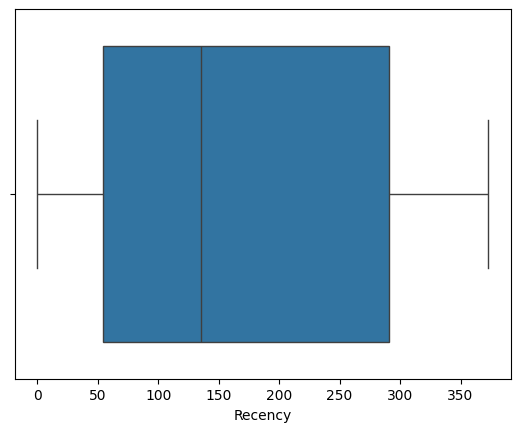

Frequency: 


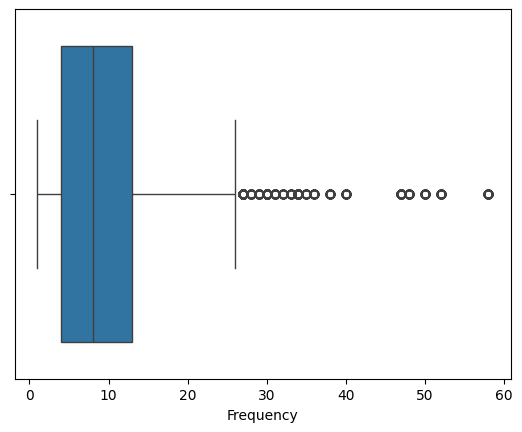

monetary_value: 


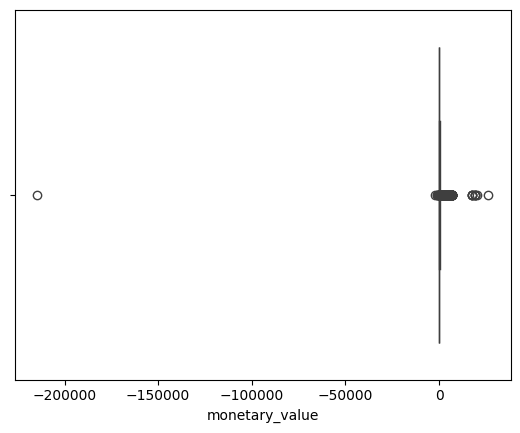

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['Recency','Frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [ ]:
#recency has no visible outliers but monetary_value and frequency do. lets identify them using z-score and remove them
from scipy import stats
import numpy as np
# remove the customer id column
new_df = finaldf[['Recency','Frequency','monetary_value']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

new_df

,Recency,Frequency,monetary_value
1,6,5,142.29
2,6,5,142.29
3,6,5,142.29
4,6,5,142.29
5,6,5,142.29
...,...,...,...
20589,172,5,588.60
20590,172,5,588.60
20591,172,5,588.60
20592,172,5,588.60


##Step 4: Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['Recency', 'Frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

scaled_features

,Recency,Frequency,monetary_value
0,-1.249859,0.007113,-0.018972
1,-1.173431,-0.638936,0.765234
2,1.713846,1.299211,0.082405
3,-0.765816,-0.423586,0.203803
4,-0.646928,-0.423586,-0.265200
...,...,...,...
4052,1.246786,-0.638936,-0.464019
4053,0.338143,-0.854286,-0.346322
4054,0.796711,-0.208237,-0.405204
4055,-0.995099,1.299211,-0.394303


#Step 5: building customer segmentation model

Text(0, 0.5, 'Inertia')

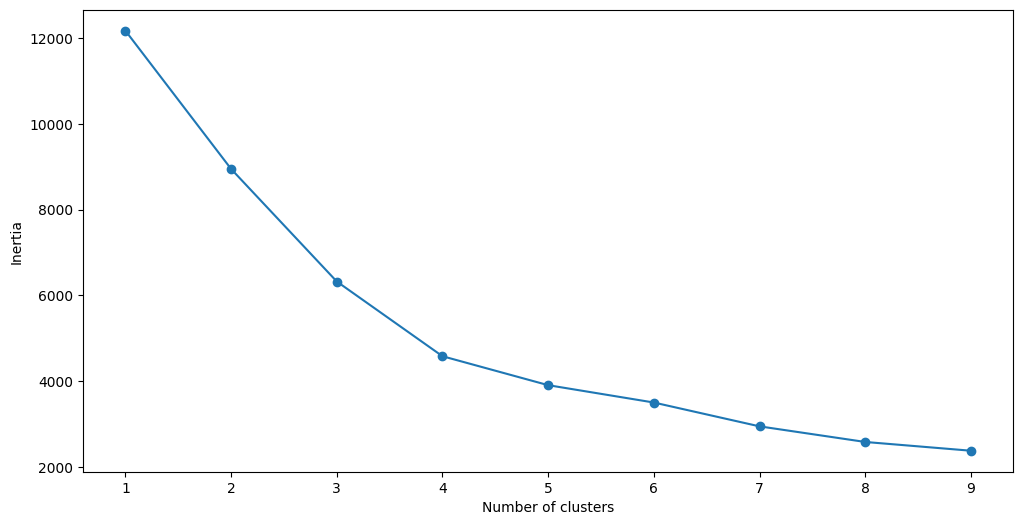

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
#the elbow of the above graph is at 4, so let us use number of clusters = 4
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [ ]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4317524156729618


##Step 5: segmentation model interpretation and visualization

In [ ]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

frame

,Recency,Frequency,monetary_value,cluster
1,6,5,142.29,1
6,15,2,375.36,1
8,355,11,172.42,0
19,63,3,208.50,1
22,77,3,69.11,1
...,...,...,...,...
20571,300,2,10.02,0
20573,193,1,45.00,0
20574,247,4,27.50,0
20578,36,11,30.74,3


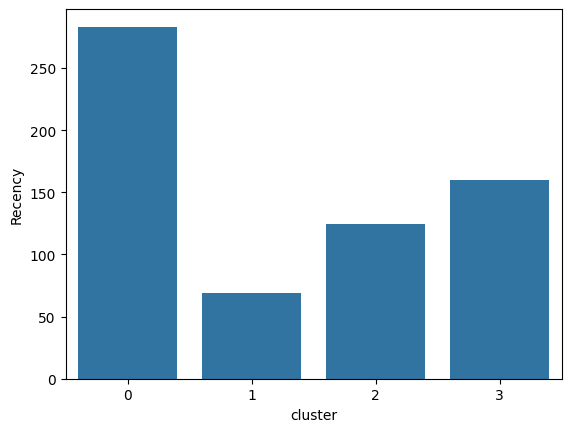

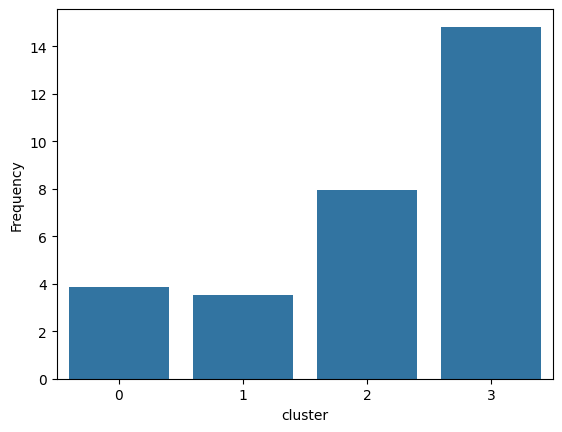

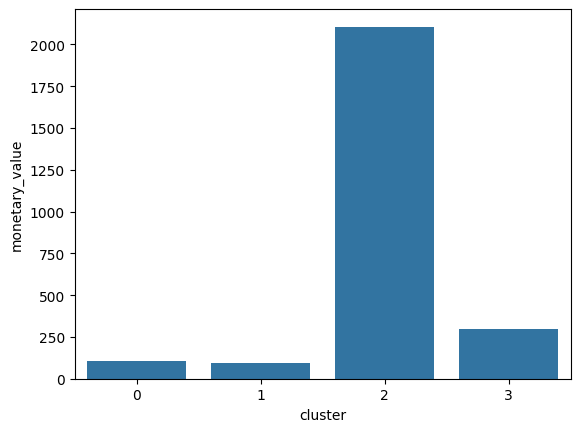

In [ ]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

##Cluster Analysis
1) Cluster 0

Recency: Low

Frequency: Low

Monetary value: very low

These customers have made purchases recently (low recency score), but their purchase frequency and monetary value are low.


Likely Interpretation: They could be new or infrequent customers who have recently engaged with the business but haven't spent much.

2) Cluster 1

Recency: Moderate

Frequency: very high

Monetary value: moderate

These customers purchase frequently and contribute a moderate monetary value.


Likely Interpretation: These are potentially loyal customers who buy frequently, but their individual purchases are moderate in value.

3) Cluster 2

Recency: moderate

Frequency: moderate

Monetary value: Extremely high

These customers are somewhat frequent buyers and contribute the most in terms of monetary value.

Likely Interpretation: These could be high-value customers, making fewer purchases than Cluster 1 but spending significantly more.

4) Cluster 3

Recency: very high

Frequency: low

monetary value: very low

These customers have not purchased in a long time, and when they did, their spending and frequency were low.

Likely Interpretation: This cluster may consist of lost customers or customers who are inactive and may need re-engagement strategies.

Summary:

Cluster 0: Recently active, low spenders.

Cluster 1: Frequent buyers, moderate spenders (loyal customers).

Cluster 2: High spenders, moderate frequency (VIP/high-value customers).

Cluster 3: Inactive, low spenders (lost customers).

Actions You Could Take:

Cluster 0: Nurture them with targeted marketing to increase their frequency and spend.

Cluster 1: Encourage these loyal customers to spend more, perhaps through cross-selling or up-selling.

Cluster 2: Keep these high-value customers happy through personalized offers and loyalty programs.

Cluster 3: Implement re-engagement strategies, such as special discounts, to reactivate these customers.
